In [1]:
# example of a cnn for image classification
import os, sys, cv2
import tensorflow as tf
from numpy import asarray
from numpy import unique
from numpy import argmax
from matplotlib import pyplot
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from google.colab import drive
from google.colab.patches import cv2_imshow

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# summarize loaded dataset
print("Train: train_images.shape = %s, train_labels.shape = %s" % (train_images.shape, train_labels.shape))
print("Test: test_images.shape = %s, test_labels.shape = %s" % (test_images.shape, test_labels.shape))

4431872/4422102 [==============================] - 0s 0us/step
Train: train_images.shape = (60000, 28, 28), train_labels.shape = (60000,)
Test: test_images.shape = (10000, 28, 28), test_labels.shape = (10000,)


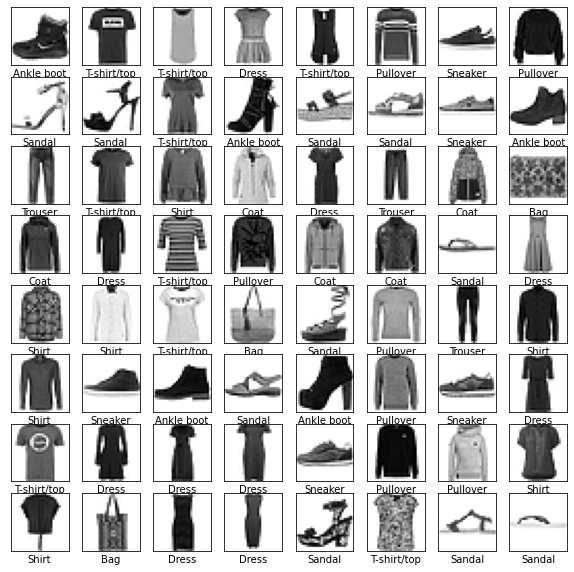

In [3]:
# plot first few images
pyplot.figure(figsize=(10,10))
for i in range(64):
  # define subplot
  pyplot.subplot(8, 8, i+1)
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.grid(False)
  # plot raw pixel data
  pyplot.imshow(train_images[i], cmap=pyplot.cm.binary)
  pyplot.xlabel(class_names[train_labels[i]])
# show the figure
pyplot.show()

In [4]:
# reshape data to have a single channel
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
# determine the shape of the input images
in_shape = train_images.shape[1:]
# determine the number of classes
n_classes = len(unique(train_labels))
print('After reshape, train_images.shape = %s, test_images.shape = %s' %(train_images.shape, test_images.shape))
print('in_shape = %s, n_classes = %s' %(in_shape, n_classes))

After reshape, train_images.shape = (60000, 28, 28, 1), test_images.shape = (10000, 28, 28, 1)
in_shape = (28, 28, 1), n_classes = 10


In [5]:
# normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [6]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [7]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 [==============================] - 31s 65ms/step - loss: 0.5893 - accuracy: 0.7866
Epoch 2/10
469/469 [==============================] - 31s 65ms/step - loss: 0.3922 - accuracy: 0.8593
Epoch 3/10
469/469 [==============================] - 30s 64ms/step - loss: 0.3427 - accuracy: 0.8738
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 0.3070 - accuracy: 0.8891
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2809 - accuracy: 0.8976
Epoch 6/10
469/469 [==============================] - 31s 65ms/step - loss: 0.2609 - accuracy: 0.9059
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2455 - accuracy: 0.9093
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2310 - accuracy: 0.9161
Epoch 9/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2161 - accuracy: 0.9210
Epoch 10/10
469/469 [==============================] - 30s 63ms/step - loss: 0.209

In [8]:
# evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.913


In [9]:
# make a prediction
image = test_images[222]
yhat = model.predict(asarray([image]))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

yhat =  [[8.40846896e-02 6.08505914e-04 8.18006516e-01 3.72233912e-02
  1.35085743e-03 3.42429871e-06 5.86006716e-02 3.12881298e-07
  1.16179915e-04 5.47702530e-06]]
Predicted: class = Pullover


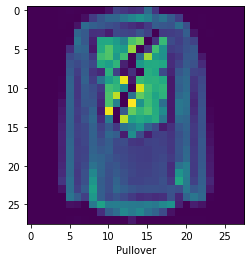

In [10]:
# actual classification of test image
pyplot.figure()
pyplot.imshow(test_images[222].squeeze())
pyplot.xlabel(class_names[test_labels[222]])
pyplot.show()

Mounted at /content/drive


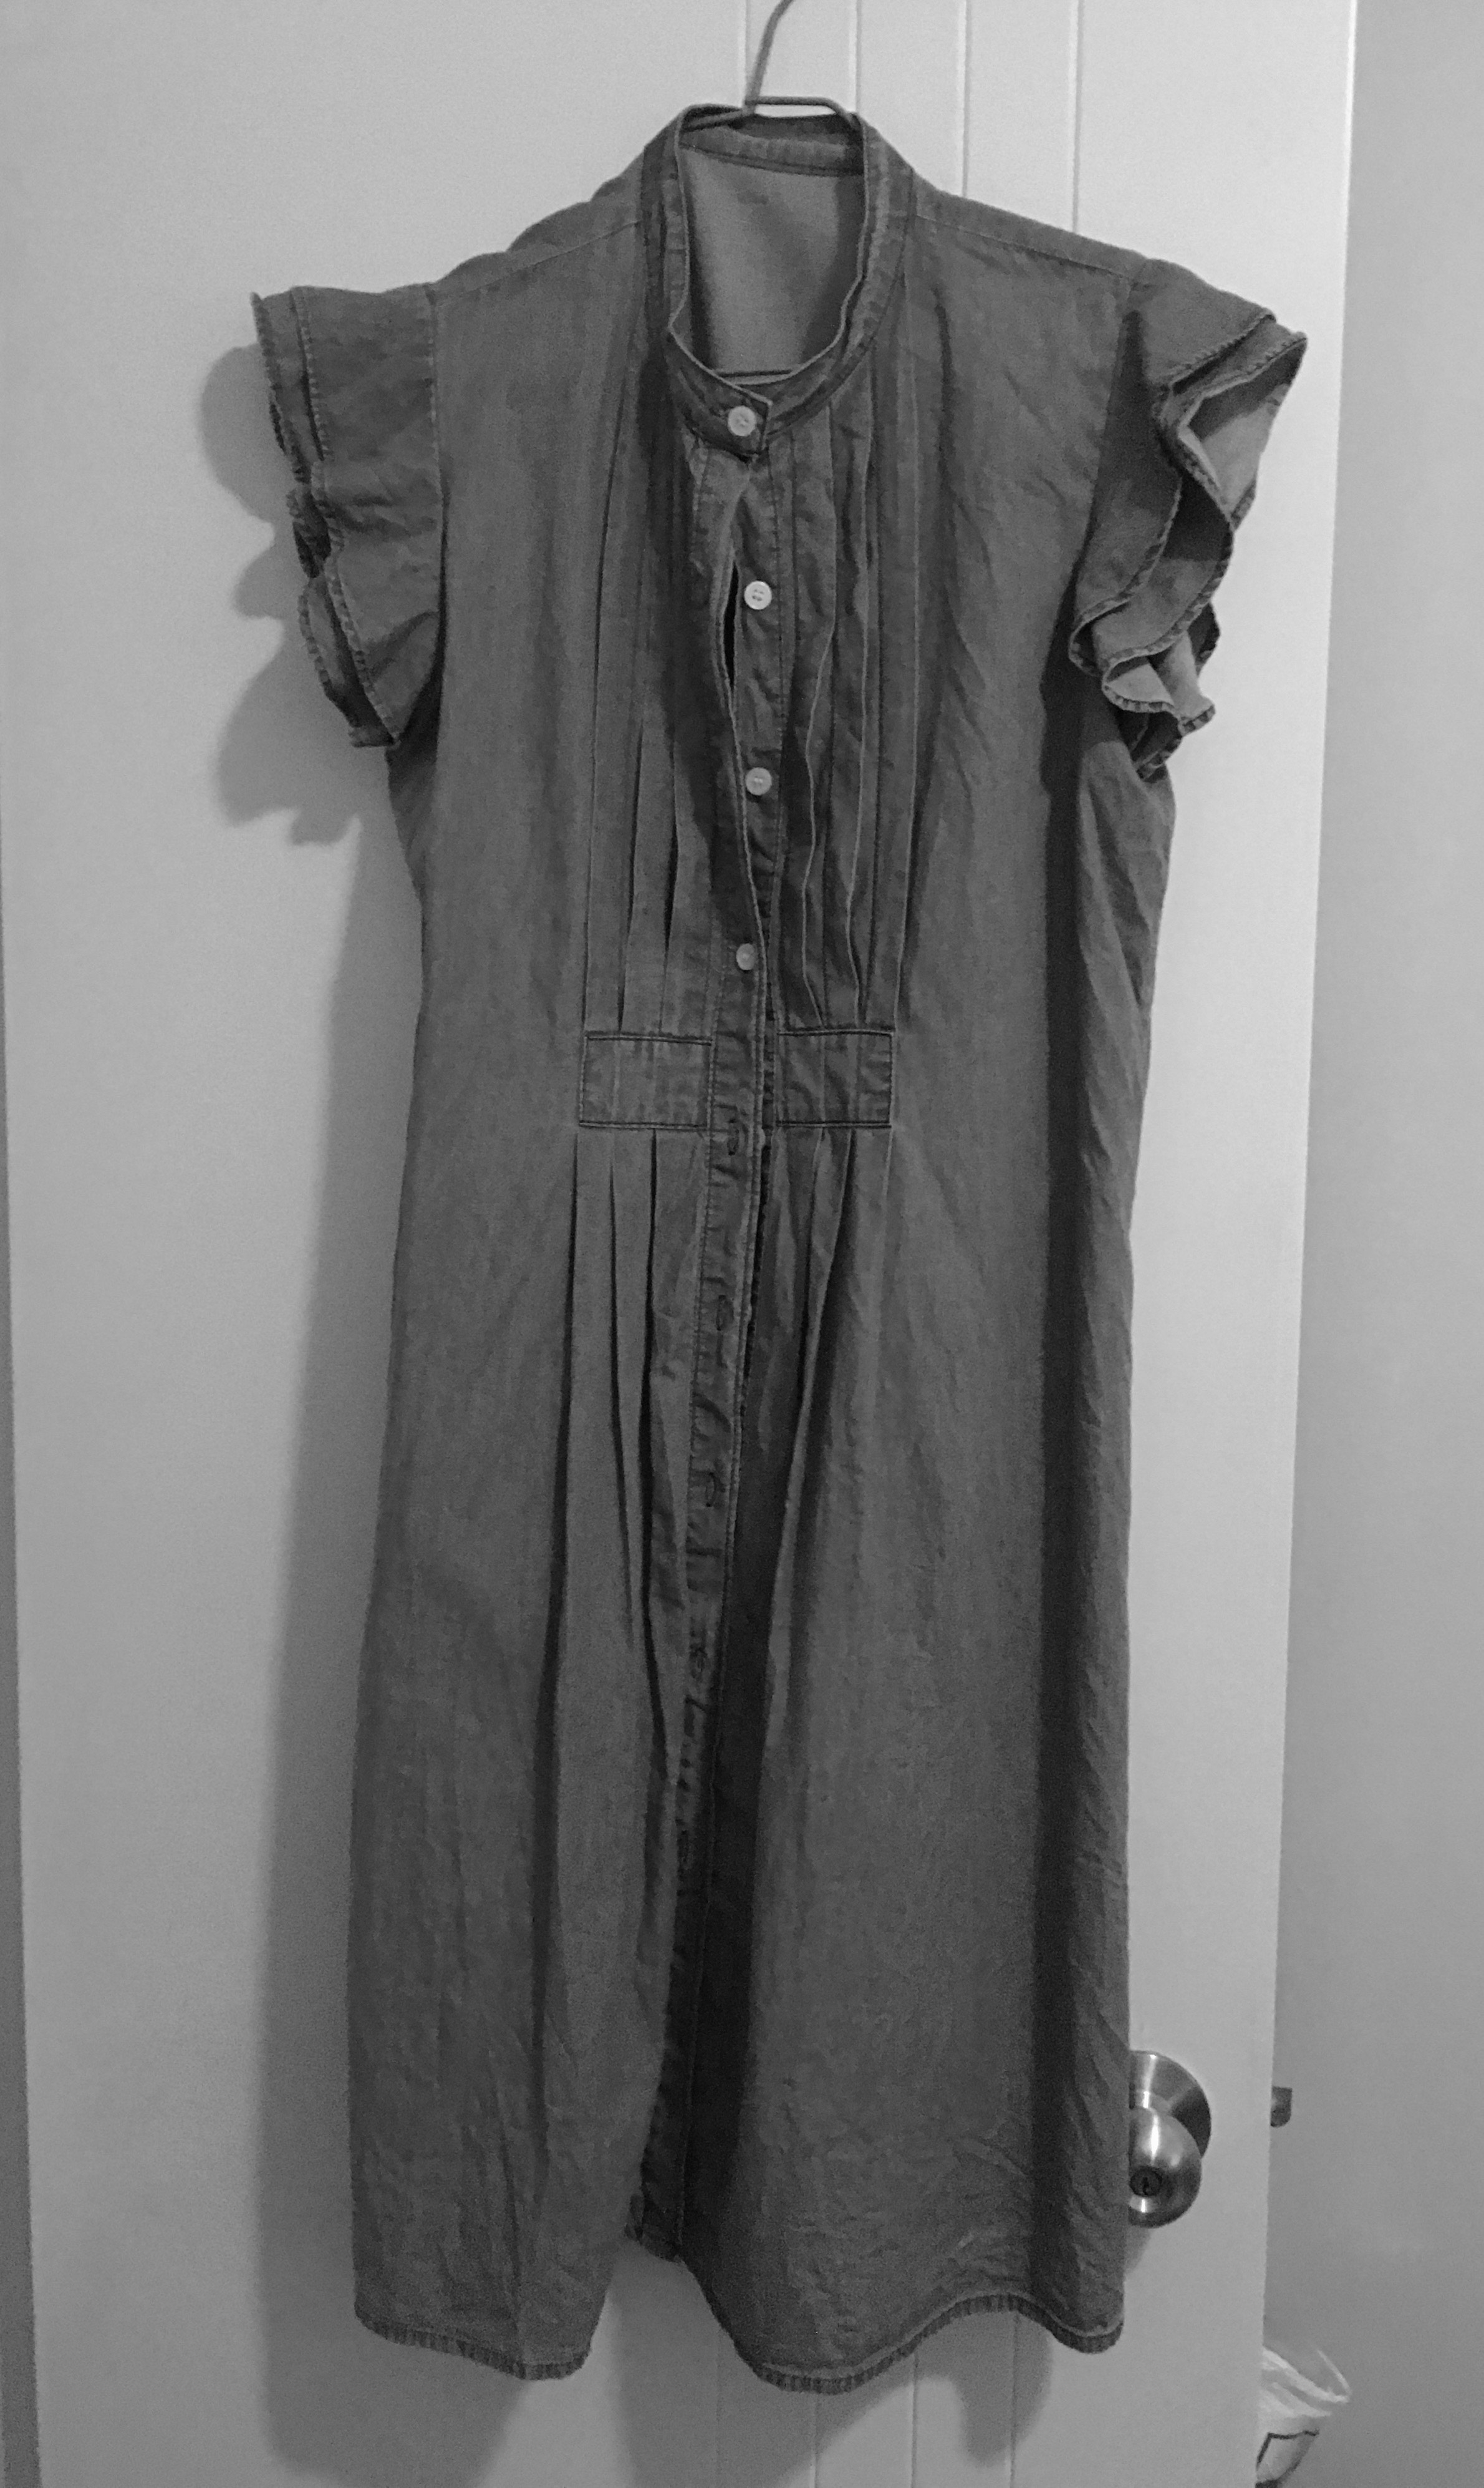

Before preprossing, img.shape =  (3989, 2380)


In [11]:
# Read an external image
drive.mount("/content/drive")
img = cv2.imread('/content/drive/My Drive/IMG_5247.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print("Before preprossing, img.shape = ", img.shape)

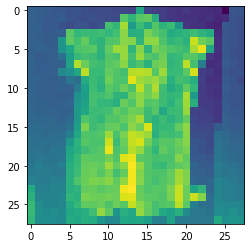

In [12]:
imgsize = 28
img = cv2.bitwise_not(img)
img = cv2.resize(img, (imgsize, imgsize))
cv2_imshow(img)
pyplot.figure()
pyplot.imshow(img)
pyplot.show()

In [13]:
# Reshape the image for the CNN fashion model
img = tf.expand_dims(img, -1)
img = tf.divide(img, 255)
img = tf.reshape(img, [1, imgsize, imgsize, 1])
print("After preprossing, img.shape = ", img.shape)

After preprossing, img.shape =  (1, 28, 28, 1)


In [16]:
# Predict about the image
yhat = model.predict(asarray(img))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

yhat =  [[0.03165998 0.10979202 0.02046338 0.03010448 0.23907898 0.00243714
  0.5054398  0.00556974 0.05283979 0.00261467]]
Predicted: class = Shirt
